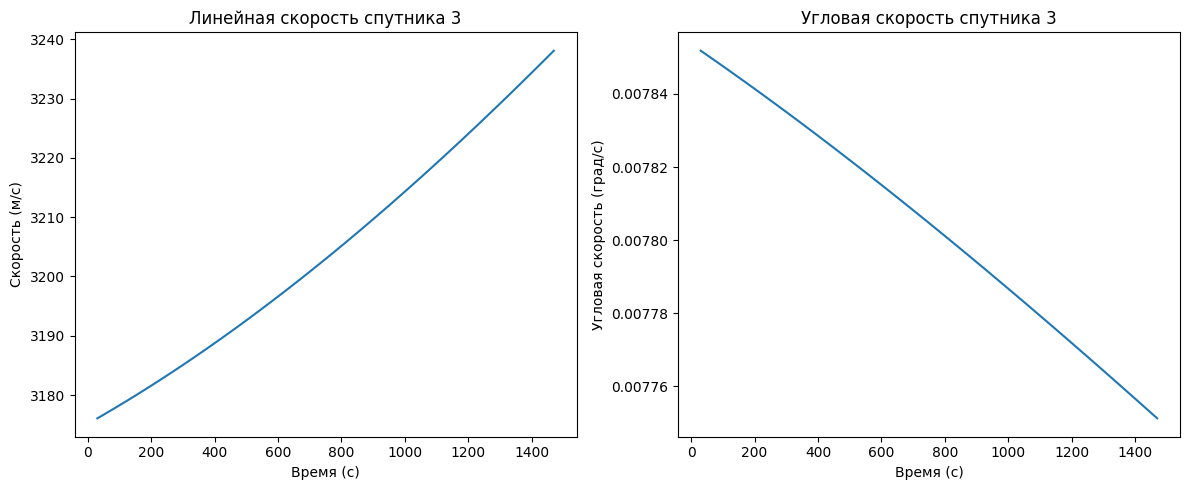

Спутник 3: средняя линейная скорость = 3204.39 м/с, средняя угловая = 0.007804 град/с


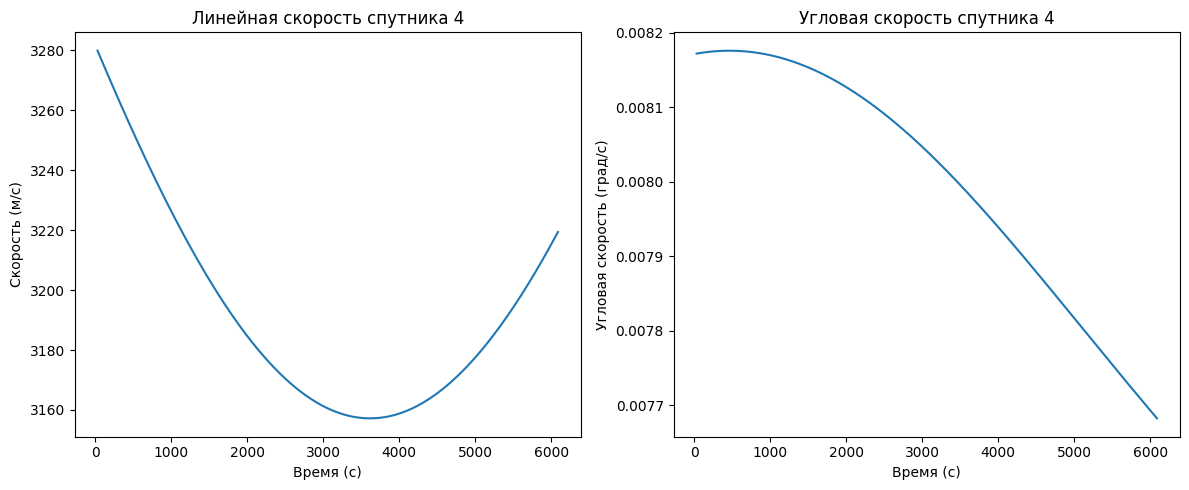

Спутник 4: средняя линейная скорость = 3191.58 м/с, средняя угловая = 0.008001 град/с


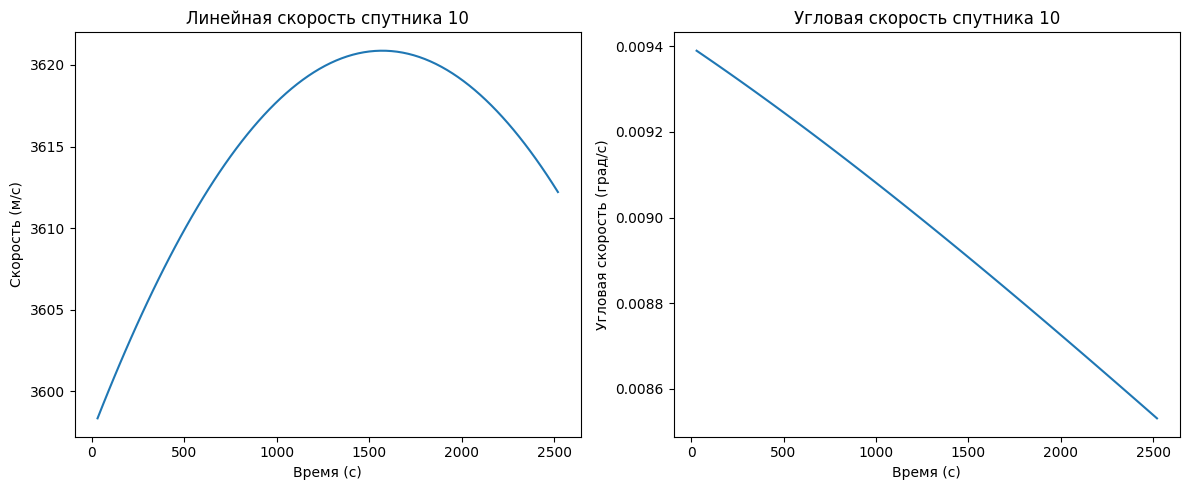

Спутник 10: средняя линейная скорость = 3614.98 м/с, средняя угловая = 0.008978 град/с


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузим файл
with open('ONSA_1-6.dat', 'r') as f:
    lines = f.readlines()

# Преобразуем в DataFrame
data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) == 22:  # Убедимся, что все параметры на месте
        data.append(parts)

columns = [
    'sat_id', 'ro', 'P1', 'P2', 'L1', 'L2', 'Mw', 'Md', 'Td', 'Tw',
    'Tw_estimate', 'dt', 'dTrec_estimate', 'A', 'windup_metr',
    'elevation', 'x_sat', 'y_sat', 'z_sat', 'P3', 'L3', 'R_geom'
]  # столбцы

df = pd.DataFrame(data, columns=columns)
df[columns[1:]] = df[columns[1:]].astype(float)  # Все кроме sat_id в float

# Выбираем 3 уникальных спутника
unique_sats = df['sat_id'].unique()[:3]

for sat in unique_sats:
    sat_df = df[df['sat_id'] == sat].reset_index(drop=True)

    # Возьмем 3 часа (360 эпох)
    sat_df = sat_df.iloc[:360]

    # Время в секундах
    time = np.arange(len(sat_df)) * 30  # шаг 30 сек

    # Линейная скорость — производная координат
    coords = sat_df[['x_sat', 'y_sat', 'z_sat']].astype(float).values
    velocity = np.linalg.norm(np.diff(coords, axis=0), axis=1) / 30  # м/с
    avg_velocity = np.mean(velocity)

    # Угловая скорость — угол между векторами R (от станции к спутнику)
    station = np.array([3370601.790, 711917.542, 5349837.123])  # координаты станции ONSA в метрах
    vectors = coords - station
    unit_vectors = vectors / np.linalg.norm(vectors, axis=1)[:, None]
    angles = np.arccos(np.clip(np.sum(unit_vectors[:-1] * unit_vectors[1:], axis=1), -1.0, 1.0))
    ang_velocity = angles / 30  # рад/с
    avg_ang_velocity = np.mean(ang_velocity)

    # Графики
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(time[1:], velocity)
    plt.title(f'Линейная скорость спутника {sat}')
    plt.xlabel('Время (с)')
    plt.ylabel('Скорость (м/с)')

    plt.subplot(1, 2, 2)
    plt.plot(time[1:], np.degrees(ang_velocity))
    plt.title(f'Угловая скорость спутника {sat}')
    plt.xlabel('Время (с)')
    plt.ylabel('Угловая скорость (град/с)')

    plt.tight_layout()
    plt.show()

    print(
        f'Спутник {sat}: средняя линейная скорость = {avg_velocity:.2f} м/с, '
        f'средняя угловая = {np.degrees(avg_ang_velocity):.6f} град/с'
    )
